# Ciência Dos Dados - Projeto 1


#### Gabriel Ligeiro - Turma 2A


## Titulo:Acesso a Internet Domestica e TV no Brasil durante 2013 a 2015

 ### Introdução: Compreender  como a renda per capta influência no acesso a Internet doméstica e a TV nas áreas rurais e urbanas no Brasil entre os anos de 2013 e 2015?



## Classes Sociais segundo IBGE
## SM: Salário Mínimo
### A --  > 20 SM
### B --  10 a 20 SM
### C --  4 a 10 SM
### D -- 2 a 4 SM
### E -- < 2SM
### SM(2015): 788,00 Reais
### SM(2014): 724,00 Reais
### SM(2013): 678,00 Reais


# DOM 2015

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import math
import os


novo_dados = pd.read_csv("resumo2015.csv", sep= ',')
#tirando os null 
novo_dados = novo_dados[pd.notnull(novo_dados.UF)&pd.notnull(novo_dados.V0227)]
#criando o DataFrame
novo_dados = pd.DataFrame(novo_dados)
#mudando os nomes das colunas
novo_dados.columns = ["Nº","UF", "PB","COR","Internet","RendaperCap", "Area"]
#Criando Categorias
novo_dados.UF = novo_dados.UF.astype('category')
novo_dados.PB = novo_dados.PB.astype('category')
novo_dados.COR = novo_dados.COR.astype('category')
novo_dados.Internet = novo_dados.Internet.astype('category')
novo_dados.Area = novo_dados.Area.astype('category')
novo_dados.RendaperCap = novo_dados.RendaperCap.astype('float')
#tirar o valor absurdo de 99999999 da renda per cap
novo_dados = novo_dados[novo_dados.RendaperCap != 999999999999]

#mudando rotulos categoricos
novo_dados.UF.cat.categories = ("Rondonia","Acre","Amazonas","Roraima", \
"Pará","Amapá", "Tocantins", "Maranhão", "Piauí", "Ceará","Rio Grande do Norte","Paraíba", \
"Pernambuco","Alagoas","Sergipe","Bahia","Minas Gerais","Espírito Santo","Rio de Janeiro",\
"São Paulo","Paraná","Santa Catarina","Rio Grande do Sul","Mato Grosso do Sul","Mato Grosso","Goiás","Distrito Federal")
novo_dados.PB.cat.categories = ("Sim","Não")
novo_dados.COR.cat.categories = ("Sim")
novo_dados.Internet.cat.categories = ("Sim", "Não")
novo_dados.Area.cat.categories = ["Urbana1","Urbana2","Urbana3","Rural1","Rural2","Rural3","Rural4","Rural5"]

#criando nova coluna de Area

novo_dados.loc[(novo_dados.Area == "Urbana1") | (novo_dados.Area == "Urbana2")| \
(novo_dados.Area == "Urbana3"), "Area_Nova"] = "Urbana" 
novo_dados.loc[(novo_dados.Area == "Rural1") | (novo_dados.Area == "Rural2")| \
(novo_dados.Area == "Rural3")| (novo_dados.Area == "Rural4")| (novo_dados.Area == "Rural5"), "Area_Nova"] = "Rural" 


#criando nova coluna de TV
novo_dados.loc[(novo_dados.PB == "Sim"), "TV"] = "Sim"
novo_dados.loc[(novo_dados.PB == "Não"), "TV"] = "Não"
novo_dados.loc[(novo_dados.COR == "Sim"), "TV"] = "Sim"
novo_dados.loc[(novo_dados.COR == "Não"), "TV"] = "Não"
#criando nova coluna de TV
"""
Classes Sociais segundo IBGE
A --  > 20 SM
B -- 10 a 20 SM
C -- 4 a 10 
D -- 2 a 4 SM
E -- < 2SM

"""
sm = 788
novo_dados.loc[(novo_dados.RendaperCap < 2*sm ), "Classe"] = "E"
novo_dados.loc[(novo_dados.RendaperCap > 2*sm) & (novo_dados.RendaperCap < 4*sm), "Classe"] = "D"
novo_dados.loc[(novo_dados.RendaperCap > 4*sm) & (novo_dados.RendaperCap < 10*sm), "Classe"] = "C"
novo_dados.loc[(novo_dados.RendaperCap > 10*sm) & (novo_dados.RendaperCap < 20*sm), "Classe"] = "B"
novo_dados.loc[(novo_dados.RendaperCap > 20*sm), "Classe"] = "A"

#FAIXAS
faixa1 = range(0,5000,25)
faixa = [0,sm*2,4*sm,10*sm,20*sm,30*sm]
#criando renda area urbana
rendaU = novo_dados.RendaperCap[novo_dados.Area_Nova == "Urbana"]
#criando renda area rural
rendaR = novo_dados.RendaperCap[novo_dados.Area_Nova == "Rural"]
#dividindo a area urbana em classes sociais 
rendaUfaixa = pd.cut(rendaU, faixa, False)
#dividindo a area rural em classes sociais 
rendaRfaixa = pd.cut(rendaR, faixa, False)

novo_dados.head()

,Nº,UF,PB,COR,Internet,RendaperCap,Area,Area_Nova,TV,Classe
2,2,Rondonia,Não,Sim,Sim,1150.0,Urbana1,Urbana,Sim,E
4,4,Rondonia,Não,Sim,Não,2900.0,Urbana1,Urbana,Sim,D
72,72,Rondonia,Não,Sim,Sim,590.0,Urbana1,Urbana,Sim,E
75,75,Rondonia,Sim,Sim,Não,1260.0,Urbana1,Urbana,Sim,E
83,83,Rondonia,Não,Sim,Não,863.0,Urbana1,Urbana,Sim,E



# DOM 2014

In [2]:

novo_dados1 = pd.read_csv("resumo2014.csv", sep= ',')
#tirando os null 
novo_dados1 = novo_dados1[pd.notnull(novo_dados1.UF)&pd.notnull(novo_dados1.V0227)]
#criando o DataFrame
novo_dados1 = pd.DataFrame(novo_dados1)
#mudando os nomes das colunas
novo_dados1.columns = ["Nº","UF", "PB","COR","Internet","RendaperCap", "Area"]
#Criando Categorias
novo_dados1.UF = novo_dados1.UF.astype('category')
novo_dados1.PB = novo_dados1.PB.astype('category')
novo_dados1.COR = novo_dados1.COR.astype('category')
novo_dados1.Internet = novo_dados1.Internet.astype('category')
novo_dados1.Area = novo_dados1.Area.astype('category')
novo_dados1.RendaperCap = novo_dados1.RendaperCap.astype('float')
#tirar o valor absurdo de 99999999 da renda per cap
novo_dados1 = novo_dados1[novo_dados1.RendaperCap != 999999999999]

#mudando rotulos categoricos
novo_dados1.UF.cat.categories = ("Rondonia","Acre","Amazonas","Roraima", \
"Pará","Amapá", "Tocantins", "Maranhão", "Piauí", "Ceará","Rio Grande do Norte","Paraíba", \
"Pernambuco","Alagoas","Sergipe","Bahia","Minas Gerais","Espírito Santo","Rio de Janeiro",\
"São Paulo","Paraná","Santa Catarina","Rio Grande do Sul","Mato Grosso do Sul","Mato Grosso","Goiás","Distrito Federal")
novo_dados1.PB.cat.categories = ("Sim","Não")
novo_dados1.COR.cat.categories = ("Sim")
novo_dados1.Internet.cat.categories = ("Sim", "Não")
novo_dados1.Area.cat.categories = ["Urbana1","Urbana2","Urbana3","Rural1","Rural2","Rural3","Rural4","Rural5"]

#criando nova coluna de Area

novo_dados1.loc[(novo_dados1.Area == "Urbana1") | (novo_dados1.Area == "Urbana2")| \
(novo_dados1.Area == "Urbana3"), "Area_Nova"] = "Urbana" 
novo_dados1.loc[(novo_dados1.Area == "Rural1") | (novo_dados1.Area == "Rural2")| \
(novo_dados1.Area == "Rural3")| (novo_dados1.Area == "Rural4")| (novo_dados1.Area == "Rural5"), "Area_Nova"] = "Rural" 


#criando nova coluna de TV
novo_dados1.loc[(novo_dados1.PB == "Sim"), "TV"] = "Sim"
novo_dados1.loc[(novo_dados1.PB == "Não"), "TV"] = "Não"
novo_dados1.loc[(novo_dados1.COR == "Sim"), "TV"] = "Sim"
novo_dados1.loc[(novo_dados1.COR == "Não"), "TV"] = "Não"
#criando nova coluna de TV
"""
Classes Sociais segundo IBGE
A --  > 20 SM
B -- 10 a 20 SM
C -- 4 a 10 
D -- 2 a 4 SM
E -- < 2SM

"""
sm = 724
novo_dados1.loc[(novo_dados1.RendaperCap < 2*sm ), "Classe"] = "E"
novo_dados1.loc[(novo_dados1.RendaperCap > 2*sm) & (novo_dados1.RendaperCap < 4*sm), "Classe"] = "D"
novo_dados1.loc[(novo_dados1.RendaperCap > 4*sm) & (novo_dados1.RendaperCap < 10*sm), "Classe"] = "C"
novo_dados1.loc[(novo_dados1.RendaperCap > 10*sm) & (novo_dados1.RendaperCap < 20*sm), "Classe"] = "B"
novo_dados1.loc[(novo_dados1.RendaperCap > 20*sm), "Classe"] = "A"

#FAIXAS
faixa1 = range(0,5000,25)
faixa = [0,sm*2,4*sm,10*sm,20*sm]
#criando renda area urbana
rendaU1 = novo_dados1.RendaperCap[novo_dados1.Area_Nova == "Urbana"]
#criando renda area rural
rendaR1 = novo_dados1.RendaperCap[novo_dados1.Area_Nova == "Rural"]
#dividindo a area urbana em classes sociais 
rendaUfaixa1 = pd.cut(rendaU1, faixa, False)
#dividindo a area rural em classes sociais 
rendaRfaixa1 = pd.cut(rendaR1, faixa, False)





# DOM 2013

In [3]:

novo_dados2 = pd.read_csv("resumo2013.csv", sep= ',')
#tirando os null 
novo_dados2 = novo_dados2[pd.notnull(novo_dados2.UF)&pd.notnull(novo_dados2.V0227)]
#criando o DataFrame
novo_dados2 = pd.DataFrame(novo_dados2)
#mudando os nomes das colunas
novo_dados2.columns = ["Nº","UF", "PB","COR","Internet","RendaperCap", "Area"]
#Criando Categorias
novo_dados2.UF = novo_dados2.UF.astype('category')
novo_dados2.PB = novo_dados2.PB.astype('category')
novo_dados2.COR = novo_dados2.COR.astype('category')
novo_dados2.Internet = novo_dados2.Internet.astype('category')
novo_dados2.Area = novo_dados2.Area.astype('category')
novo_dados2.RendaperCap = novo_dados2.RendaperCap.astype('float')
#tirar o valor absurdo de 99999999 da renda per cap
novo_dados2 = novo_dados2[novo_dados2.RendaperCap != 999999999999]

#mudando rotulos categoricos
novo_dados2.UF.cat.categories = ("Rondonia","Acre","Amazonas","Roraima", \
"Pará","Amapá", "Tocantins", "Maranhão", "Piauí", "Ceará","Rio Grande do Norte","Paraíba", \
"Pernambuco","Alagoas","Sergipe","Bahia","Minas Gerais","Espírito Santo","Rio de Janeiro",\
"São Paulo","Paraná","Santa Catarina","Rio Grande do Sul","Mato Grosso do Sul","Mato Grosso","Goiás","Distrito Federal")
novo_dados2.PB.cat.categories = ("Sim","Não")
novo_dados2.COR.cat.categories = ("Sim")
novo_dados2.Internet.cat.categories = ("Sim", "Não")
novo_dados2.Area.cat.categories = ["Urbana1","Urbana2","Urbana3","Rural1","Rural2","Rural3","Rural4","Rural5"]

#criando nova coluna de Area

novo_dados2.loc[(novo_dados2.Area == "Urbana1") | (novo_dados2.Area == "Urbana2")| \
(novo_dados2.Area == "Urbana3"), "Area_Nova"] = "Urbana" 
novo_dados2.loc[(novo_dados2.Area == "Rural1") | (novo_dados2.Area == "Rural2")| \
(novo_dados2.Area == "Rural3")| (novo_dados2.Area == "Rural4")| (novo_dados2.Area == "Rural5"), "Area_Nova"] = "Rural" 


#criando nova coluna de TV
novo_dados2.loc[(novo_dados2.PB == "Sim"), "TV"] = "Sim"
novo_dados2.loc[(novo_dados2.PB == "Não"), "TV"] = "Não"
novo_dados2.loc[(novo_dados2.COR == "Sim"), "TV"] = "Sim"
novo_dados2.loc[(novo_dados2.COR == "Não"), "TV"] = "Não"
#criando nova coluna de TV
"""
Classes Sociais segundo IBGE
A --  > 20 SM
B -- 10 a 20 SM
C -- 4 a 10 
D -- 2 a 4 SM
E -- < 2SM

"""
sm = 678
novo_dados2.loc[(novo_dados2.RendaperCap < 2*sm ), "Classe"] = "E"
novo_dados2.loc[(novo_dados2.RendaperCap > 2*sm) & (novo_dados2.RendaperCap < 4*sm), "Classe"] = "D"
novo_dados2.loc[(novo_dados2.RendaperCap > 4*sm) & (novo_dados2.RendaperCap < 10*sm), "Classe"] = "C"
novo_dados2.loc[(novo_dados2.RendaperCap > 10*sm) & (novo_dados2.RendaperCap < 20*sm), "Classe"] = "B"
novo_dados2.loc[(novo_dados2.RendaperCap > 20*sm), "Classe"] = "A"

#FAIXAS
faixa1 = range(0,5000,25)
faixa = [0,sm*2,4*sm,10*sm,20*sm]
#criando renda area urbana
rendaU2 = novo_dados2.RendaperCap[novo_dados2.Area_Nova == "Urbana"]
#criando renda area rural
rendaR2 = novo_dados2.RendaperCap[novo_dados2.Area_Nova == "Rural"]
#dividindo a area urbana em classes sociais 
rendaUfaixa2 = pd.cut(rendaU2, faixa, False)
#dividindo a area rural em classes sociais 
rendaRfaixa2 = pd.cut(rendaR2, faixa, False)



# Gráficos 

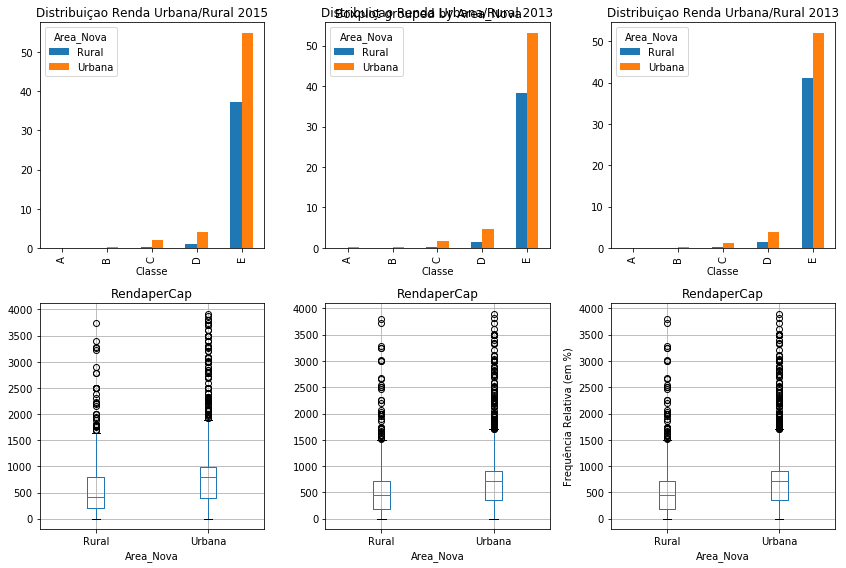

In [4]:
fig,axes = plt.subplots(nrows=2,ncols=3)

#2015
grendaurbana = pd.crosstab(novo_dados.Classe,novo_dados.Area_Nova, normalize = True)*100
plot = grendaurbana.plot(kind="bar", ax=axes[0,0], figsize = (12,8), title = "Distribuiçao Renda Urbana/Rural 2015")
plt.ylabel('Frequência Relativa (em %)')
plt.xlabel('Classe Social')

renda = novo_dados[novo_dados.RendaperCap < 4000]

renda.boxplot(column ="RendaperCap", by="Area_Nova", figsize = (11,11),ax=axes[1,0])
#2014
grendaurbana1 = pd.crosstab(novo_dados1.Classe,novo_dados1.Area_Nova, normalize = True)*100
plot = grendaurbana1.plot(kind="bar", figsize = (12,8),ax=axes[0,1], title = "Distribuiçao Renda Urbana/Rural 2013")
plt.ylabel('Frequência Relativa (em %)')
plt.xlabel('Classe Social')

renda1 = novo_dados1[novo_dados1.RendaperCap < 4000]

renda1.boxplot(column ="RendaperCap", by="Area_Nova",ax=axes[1,1] ,figsize = (11,11))

#2013
grendaurbana2 = pd.crosstab(novo_dados2.Classe,novo_dados2.Area_Nova, normalize = True)*100
plot = grendaurbana2.plot(kind="bar", figsize = (12,8),ax=axes[0,2], title = "Distribuiçao Renda Urbana/Rural 2013")
plt.ylabel('Frequência Relativa (em %)')
plt.xlabel('Classe Social')

renda2 = novo_dados2[novo_dados2.RendaperCap < 4000]

renda1.boxplot(column ="RendaperCap", by="Area_Nova", ax=axes[1,2],figsize = (11,11))
plt.tight_layout()

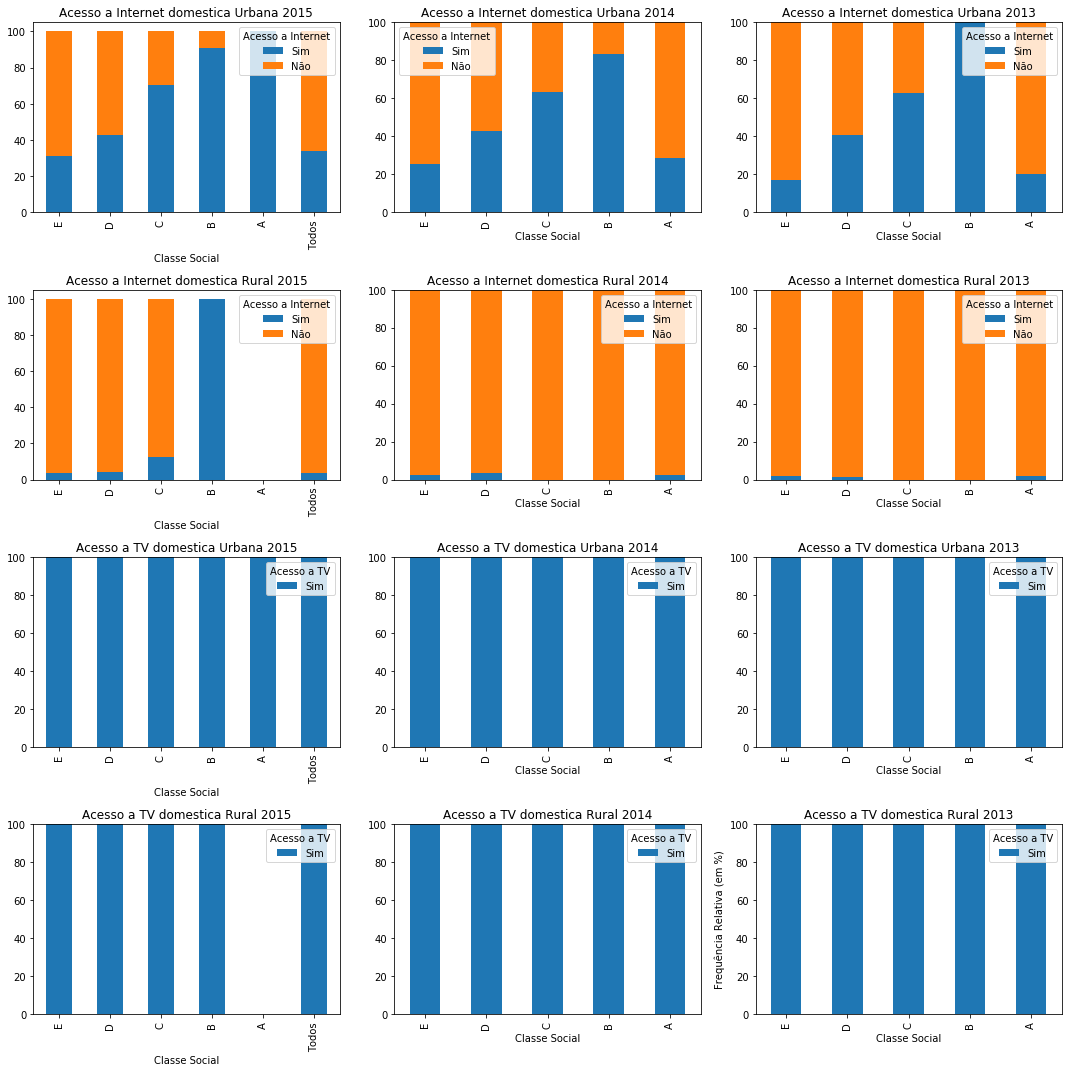

In [5]:
fig,axes = plt.subplots(nrows=4,ncols=3)
#2015
classe_int = pd.crosstab(rendaUfaixa,novo_dados.Internet, normalize = "index",margins = True,rownames = ['Classe Social'],colnames = ['Acesso a Internet'])*100
plot = classe_int.iloc[:,:].plot(kind="bar",stacked = True,ax=axes[0,0] ,figsize = (15,15),title = "Acesso a Internet domestica Urbana 2015")
plt.ylabel('Frequência Relativa (em %)')
labels = ["E","D","C","B","A","Todos"]
plot.set_xticklabels(labels)
#plot.set_ylim([0,100])




classe_int1 = pd.crosstab(rendaRfaixa,novo_dados.Internet, normalize = "index",margins = True,rownames = ['Classe Social'],colnames = ['Acesso a Internet'])*100
plot = classe_int1.iloc[:,:].plot(kind="bar",ax=axes[1,0],stacked = True,figsize = (15,15), title = "Acesso a Internet domestica Rural 2015")
plt.ylabel('Frequência Relativa (em %)')
labels = ["E","D","C","B","A","Todos"]
plot.set_xticklabels(labels)
#plot.set_ylim([0,100])



classe_int2 = pd.crosstab(rendaUfaixa,novo_dados.TV, normalize = "index",margins = True,rownames = ['Classe Social'],colnames = ['Acesso a TV'])*100
plot = classe_int2.iloc[:,:].plot(kind="bar",ax=axes[2,0],stacked = True,figsize = (15,15), title = "Acesso a TV domestica Urbana 2015")
plt.ylabel('Frequência Relativa (em %)')
labels = ["E","D","C","B","A","Todos"]
plot.set_xticklabels(labels)
plot.set_ylim([0,100])



classe_int3 = pd.crosstab(rendaRfaixa,novo_dados.TV, normalize = "index",margins = True,rownames = ['Classe Social'],colnames = ['Acesso a TV'])*100
plot = classe_int3.iloc[:,:].plot(kind="bar",ax=axes[3,0],stacked = True,figsize = (15,15), title = "Acesso a TV domestica Rural 2015")
plt.ylabel('Frequência Relativa (em %)')
labels = ["E","D","C","B","A","Todos"]
plot.set_ylim([0,100])
plot.set_xticklabels(labels)

#2014
classe_int11 = pd.crosstab(rendaUfaixa1,novo_dados1.Internet, normalize = "index",margins = True,rownames = ['Classe Social'],colnames = ['Acesso a Internet'])*100
plot = classe_int11.iloc[:,:].plot(kind="bar",ax=axes[0,1],stacked = True,figsize = (15,15), title = "Acesso a Internet domestica Urbana 2014")
plt.ylabel('Frequência Relativa (em %)')
labels = ["E","D","C","B","A","Todos"]
plot.set_xticklabels(labels)
plot.set_ylim([0,100])




classe_int12 = pd.crosstab(rendaRfaixa1,novo_dados1.Internet, normalize = "index",margins = True,rownames = ['Classe Social'],colnames = ['Acesso a Internet'])*100
plot = classe_int12.iloc[:,:].plot(kind="bar",stacked = True, ax=axes[1,1],figsize = (15,15),title = "Acesso a Internet domestica Rural 2014")
plt.ylabel('Frequência Relativa (em %)')
labels = ["E","D","C","B","A","Todos"]
plot.set_xticklabels(labels)
plot.set_ylim([0,100])


classe_int13 = pd.crosstab(rendaUfaixa1,novo_dados1.TV, normalize = "index",margins = True,rownames = ['Classe Social'],colnames = ['Acesso a TV'])*100
plot = classe_int13.iloc[:,:].plot(kind="bar",ax=axes[2,1],stacked = True,figsize = (15,15), title = "Acesso a TV domestica Urbana 2014")
plt.ylabel('Frequência Relativa (em %)')
labels = ["E","D","C","B","A","Todos"]
plot.set_xticklabels(labels)
plot.set_ylim([0,100])



classe_int14 = pd.crosstab(rendaRfaixa1,novo_dados1.TV, normalize = "index",margins = True,rownames = ['Classe Social'],colnames = ['Acesso a TV'])*100
plot = classe_int14.iloc[:,:].plot(kind="bar",ax=axes[3,1],stacked = True,figsize = (15,15), title = "Acesso a TV domestica Rural 2014")
plt.ylabel('Frequência Relativa (em %)')
labels = ["E","D","C","B","A","Todos"]
plot.set_ylim([0,100])
plot.set_xticklabels(labels)


#2013
classe_int20 = pd.crosstab(rendaUfaixa2,novo_dados2.Internet, normalize = "index",margins = True,rownames = ['Classe Social'],colnames = ['Acesso a Internet'])*100
plot = classe_int20.iloc[:,:].plot(kind="bar",stacked = True,ax=axes[0,2],figsize = (15,15) ,title = "Acesso a Internet domestica Urbana 2013")
plt.ylabel('Frequência Relativa (em %)')
labels = ["E","D","C","B","A","Todos"]
plot.set_xticklabels(labels)
plot.set_ylim([0,100])




classe_int21 = pd.crosstab(rendaRfaixa2,novo_dados2.Internet, normalize = "index",margins = True,rownames = ['Classe Social'],colnames = ['Acesso a Internet'])*100
plot = classe_int21.iloc[:,:].plot(kind="bar",ax=axes[1,2],stacked = True,figsize = (15,15), title = "Acesso a Internet domestica Rural 2013")
plt.ylabel('Frequência Relativa (em %)')
labels = ["E","D","C","B","A","Todos"]
plot.set_xticklabels(labels)
plot.set_ylim([0,100])


classe_int23 = pd.crosstab(rendaUfaixa2,novo_dados2.TV, normalize = "index",margins = True,rownames = ['Classe Social'],colnames = ['Acesso a TV'])*100
plot = classe_int23.iloc[:,:].plot(kind="bar",ax=axes[2,2],stacked = True,figsize = (15,15), title = "Acesso a TV domestica Urbana 2013")
plt.ylabel('Frequência Relativa (em %)')
labels = ["E","D","C","B","A","Todos"]
plot.set_xticklabels(labels)
plot.set_ylim([0,100])



classe_int24 = pd.crosstab(rendaRfaixa2,novo_dados2.TV, normalize = "index",margins = True,rownames = ['Classe Social'],colnames = ['Acesso a TV'])*100
plot = classe_int24.iloc[:,:].plot(kind="bar",ax=axes[3,2],stacked = True,figsize = (15,15), title = "Acesso a TV domestica Rural 2013")
plt.ylabel('Frequência Relativa (em %)')
labels = ["E","D","C","B","A","Todos"]
plot.set_ylim([0,100])
plot.set_xticklabels(labels)

plt.tight_layout()


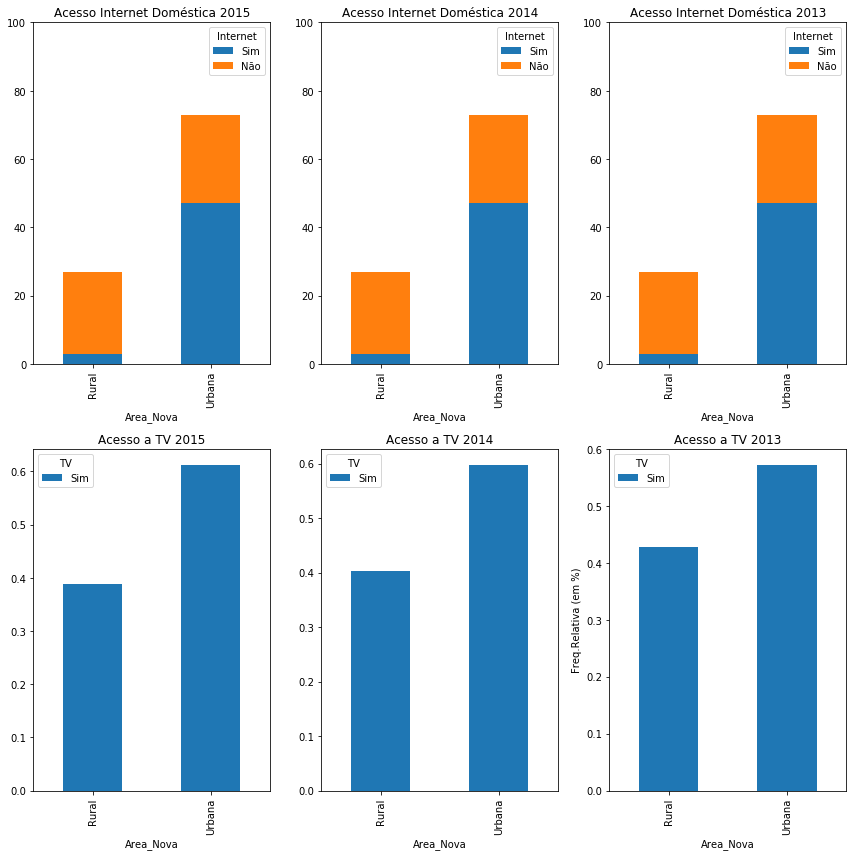

In [6]:
fig,axes = plt.subplots(nrows=2,ncols=3)
#2015
ct1 = pd.crosstab(novo_dados.Internet, novo_dados.Area_Nova, normalize = "index")
ct1 = (ct1/ct1.sum().sum()*100).round(decimals=0)
plot = ct1.T.plot(kind='bar',ax=axes[0,0], stacked=True,figsize = (12,12),title='Acesso Internet Doméstica 2015')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em %)')

ct12 = pd.crosstab(novo_dados.TV, novo_dados.Area_Nova, normalize = "index")
plot = ct12.T.plot(kind='bar', ax=axes[1,0],stacked=True,figsize = (12,12), title='Acesso a TV 2015')
plt.ylabel('Freq.Relativa (em %)')


#2014
ct6 = pd.crosstab(novo_dados1.Internet, novo_dados1.Area_Nova, normalize = "index")
ct6 = (ct6/ct6.sum().sum()*100).round(decimals=0)
plot = ct6.T.plot(kind='bar',ax=axes[0,1], stacked=True,figsize = (12,12),title='Acesso Internet Doméstica 2014')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em %)')

ct24 = pd.crosstab(novo_dados1.TV, novo_dados1.Area_Nova, normalize = "index")
plot = ct24.T.plot(kind='bar',ax=axes[1,1], stacked=True,figsize = (12,12), title='Acesso a TV 2014')
plt.ylabel('Freq.Relativa (em %)')


#2013
ct3 = pd.crosstab(novo_dados2.Internet, novo_dados2.Area_Nova, normalize = "index")
ct3 = (ct3/ct3.sum().sum()*100).round(decimals=0)
plot = ct1.T.plot(kind='bar',ax=axes[0,2], stacked=True,figsize = (12,12),title='Acesso Internet Doméstica 2013')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em %)')

ct31 = pd.crosstab(novo_dados2.TV, novo_dados2.Area_Nova, normalize = "index")
plot = ct31.T.plot(kind='bar',ax=axes[1,2], stacked=True, figsize = (12,12),title='Acesso a TV 2013')
plt.ylabel('Freq.Relativa (em %)')

plt.tight_layout()


# Conclusão




#### A Partir dos gráficos obtidos é possível concluir que o uso de Internet Doméstica cresceu durantes os anos de 2013 e 2015(esse crescimento é notável nos gráficos " acesso a Internet domestica), tanto nas áreas urbanas como as rurais. Isso aconteceria pelo fato das classes sociais "D", " C" tornarem-se mais expressivas no Brasil, assim, com domicílios de maior poder econômico aumentaria a compra de pacotes de Internet Domiciliar.Também, pode-se concluir que nas áreas Urbanas 'e onde houve um uso percentual maior da Internet Domiciliar do que nas Areas Rurais. 
#### Em relação ao acesso a TV, os graficos não foram eficientes o bastante para tirar grande conclusões, pelo o fato de quando foi retirado valores nulos ou sem informacao o pacote Pandas acabou eliminando os domicílios que "Não" tinha acesso a TV. Isso resultou em 100% dos domicílios Rurais e Urbanos a acesso a TV, o que não representa a realidade brasileira. 
